#  Human mobility and COVID-19 epidemic

Student: Nguyen Xuan Tung

ID: 2005491


## Library

In [1]:
import string         #(module for string)
import sys            #(module system)
import numpy as np    #(module mathematical stuff)
import pandas as pd 
import seaborn as sns
import random 
import fileinput
import math
import operator
import scipy
import csv
import itertools
from covid19dh import covid19
import statistics

#from skmisc.loess import loess

from matplotlib import pyplot as plt 
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from datetime import datetime
from datetime import timedelta

from scipy.stats import poisson
from scipy import stats as sps
from scipy.interpolate import interp1d
from scipy import stats

from IPython.display import clear_output

pd.options.mode.chained_assignment = None  # default='warn'


### Mobility data

In [2]:
df_mobility_italy = pd.read_csv("2021_IT_Region_Mobility_Report.csv",sep=',')
df_mobility_italy

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-01,-88,-90,-66.0,-83.0,-85,31
1,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-02,-69,-36,-66.0,-68.0,-49,21
2,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-03,-72,-42,-59.0,-62.0,-28,16
3,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-04,-23,15,-16.0,-45.0,-43,15
4,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-05,-47,5,-45.0,-58.0,-49,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46223,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-26,-47,-58,11.0,-26.0,-23,9
46224,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-27,-4,33,49.0,-40.0,-43,12
46225,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-28,-4,26,59.0,-40.0,-43,12
46226,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-29,-4,34,68.0,-38.0,-43,12


In [3]:
region_name_mobi = list(df_mobility_italy["sub_region_1"].dropna().unique())
region_name_mobi

['Abruzzo',
 'Aosta',
 'Apulia',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli-Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardy',
 'Marche',
 'Molise',
 'Piedmont',
 'Sardinia',
 'Sicily',
 'Trentino-South Tyrol',
 'Tuscany',
 'Umbria',
 'Veneto']

In [4]:
rmv_region_data = (np.array(df_mobility_italy['sub_region_2'].isnull()))
df_mobility_italy = df_mobility_italy[rmv_region_data]

In [5]:
# drop the columns that we do not require for mobility analysis.
df_mobility_italy = df_mobility_italy.drop(['country_region_code', 'country_region', 'sub_region_2','metro_area','iso_3166_2_code',
        'census_fips_code'], axis=1)
#df_mobility_italy

In [6]:
#drop the whole row itself if there exists NaN anywhere in dataframe.
df_mobility_italy = df_mobility_italy.dropna()
df_mobility_italy

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
364,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-01,-84,-89,-49.0,-82.0,-83,29
365,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-02,-62,-29,-54.0,-65.0,-48,21
366,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-03,-67,-42,-48.0,-57.0,-28,16
367,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-04,-14,19,7.0,-32.0,-38,12
368,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-05,-38,13,-35.0,-48.0,-45,17
...,...,...,...,...,...,...,...,...,...
43675,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-46,-54,-2.0,-33.0,-21,8
43676,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-5,25,27.0,-35.0,-42,11
43677,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-4,23,40.0,-34.0,-41,12
43678,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-7,28,35.0,-33.0,-42,12


In [7]:
df_mobility_italy.drop( df_mobility_italy[ df_mobility_italy['sub_region_1'] =='Trentino-South Tyrol' ].index , inplace=True)

In [8]:
df_mobility_italy['retail_and_recreation_percent_change_from_baseline'] = df_mobility_italy['retail_and_recreation_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['parks_percent_change_from_baseline'] = df_mobility_italy['parks_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['transit_stations_percent_change_from_baseline'] = df_mobility_italy['transit_stations_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['workplaces_percent_change_from_baseline'] = df_mobility_italy['workplaces_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['residential_percent_change_from_baseline'] = df_mobility_italy['residential_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['grocery_and_pharmacy_percent_change_from_baseline'] = df_mobility_italy['grocery_and_pharmacy_percent_change_from_baseline'].rolling(7).mean() 

### $R_t$ data

In [9]:
data = 'rt_value.csv'
data_table = pd.read_csv(data,sep=',')
df = pd.DataFrame(data_table)
df

,region,date,strat,type,median,mean,sd,lower_90,lower_50,lower_20,upper_20,upper_50,upper_90
0,Abruzzo,2021-09-20,NaN,estimate,0.872565,0.876741,0.097253,0.724500,0.810238,0.849405,0.897141,0.936719,1.040997
1,Abruzzo,2021-09-21,NaN,estimate,0.874433,0.877195,0.088158,0.736908,0.816285,0.852991,0.895120,0.933805,1.022161
2,Abruzzo,2021-09-22,NaN,estimate,0.876556,0.878414,0.080144,0.750884,0.821949,0.857327,0.895697,0.930370,1.011481
3,Abruzzo,2021-09-23,NaN,estimate,0.879761,0.880488,0.073245,0.763455,0.829725,0.862059,0.898415,0.927982,1.001359
4,Abruzzo,2021-09-24,NaN,estimate,0.883969,0.883510,0.067467,0.772477,0.837138,0.867073,0.900487,0.926649,0.995732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,Veneto,2022-01-20,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241
2535,Veneto,2022-01-21,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241
2536,Veneto,2022-01-22,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241
2537,Veneto,2022-01-23,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241


In [10]:
#df = df.dropna()
regions= list(df.region.unique())

In [11]:
region_name_mobi

['Abruzzo',
 'Aosta',
 'Apulia',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli-Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardy',
 'Marche',
 'Molise',
 'Piedmont',
 'Sardinia',
 'Sicily',
 'Trentino-South Tyrol',
 'Tuscany',
 'Umbria',
 'Veneto']

In [12]:
regions

['Abruzzo',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardia',
 'Marche',
 'Molise',
 'Piemonte',
 'Puglia',
 'Sardegna',
 'Sicilia',
 'Toscana',
 'Trentino-Alto Adige',
 'Umbria',
 "Valle d'Aosta",
 'Veneto']

In [13]:
regions[-1]

'Veneto'

In [14]:
replace_dict = {'Lombardy':'Lombardia','Friuli-Venezia Giulia':'Friuli Venezia Giulia','Piedmont':'Piemonte','Sardinia':'Sardegna','Sicily':'Sicilia',
               'Tuscany':'Toscana','Trentino-South Tyrol':'Trentino-Alto Adige'}

In [15]:
for i in range(len(replace_dict.keys())):
    df_mobility_italy["sub_region_1"].replace(list(replace_dict.keys())[i],list(replace_dict.values())[i], inplace=True)

In [16]:
df_mobility_italy.tail()

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
43675,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-13.857143,10.857143,1.285714,-31.000000,-27.285714,6.571429
43676,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-14.714286,10.714286,4.000000,-32.714286,-32.000000,7.714286
43677,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-16.142857,9.428571,7.714286,-34.285714,-36.428571,9.000000
43678,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-18.000000,7.857143,10.571429,-36.428571,-41.000000,10.428571
43679,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-30,-20.285714,6.571429,14.428571,-38.142857,-45.428571,11.857143


### Plot

In [17]:
data = 'rt_value.csv'
data_table = pd.read_csv(data,sep=',')
df = pd.DataFrame(data_table)
df

,region,date,strat,type,median,mean,sd,lower_90,lower_50,lower_20,upper_20,upper_50,upper_90
0,Abruzzo,2021-09-20,NaN,estimate,0.872565,0.876741,0.097253,0.724500,0.810238,0.849405,0.897141,0.936719,1.040997
1,Abruzzo,2021-09-21,NaN,estimate,0.874433,0.877195,0.088158,0.736908,0.816285,0.852991,0.895120,0.933805,1.022161
2,Abruzzo,2021-09-22,NaN,estimate,0.876556,0.878414,0.080144,0.750884,0.821949,0.857327,0.895697,0.930370,1.011481
3,Abruzzo,2021-09-23,NaN,estimate,0.879761,0.880488,0.073245,0.763455,0.829725,0.862059,0.898415,0.927982,1.001359
4,Abruzzo,2021-09-24,NaN,estimate,0.883969,0.883510,0.067467,0.772477,0.837138,0.867073,0.900487,0.926649,0.995732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,Veneto,2022-01-20,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241
2535,Veneto,2022-01-21,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241
2536,Veneto,2022-01-22,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241
2537,Veneto,2022-01-23,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241


In [18]:
#df = df.dropna()
regions= list(df.region.unique())

In [19]:
regions

['Abruzzo',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardia',
 'Marche',
 'Molise',
 'Piemonte',
 'Puglia',
 'Sardegna',
 'Sicilia',
 'Toscana',
 'Trentino-Alto Adige',
 'Umbria',
 "Valle d'Aosta",
 'Veneto']

In [20]:
regions[-1]

'Veneto'

In [21]:
df_r=df[df['region'] == regions[-1]]
df_r=df_r[df_r['date'].between("2021-09-20","2021-12-31")]

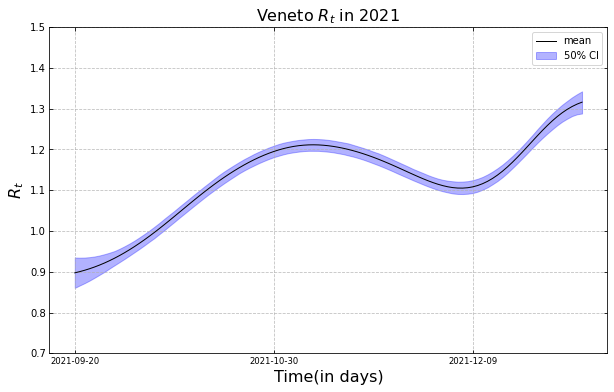

In [22]:
def get_mobdates(Rt_startdate, Rt_enddate):
    dt_format_Rtstart = datetime.strptime(Rt_startdate, '%Y-%m-%d')
    dt_format_Rtend = datetime.strptime(Rt_enddate, '%Y-%m-%d')

    dt_format_regstart = dt_format_Rtstart - timedelta(days=15)
    dt_format_regend = dt_format_Rtend - timedelta(days=15)


    reg_startdate = dt_format_regstart.strftime("%Y-%m-%d") # get it in string
    reg_enddate = dt_format_regend.strftime("%Y-%m-%d") # get it in string
    return reg_startdate, reg_enddate


#for i in regions[:-1]:
#df_r=df[df['denominazione_regione'] == 'Piemonte'] 
y=df_r['mean']
x=df_r['date']
#fig, ax = plt.subplots(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.plot(x,y,linewidth=1,color='black',label='mean')
#plt.fill_between(x, df_r['lower_90'], df_r['upper_90'], color='b', alpha=.6,label='10% CI')
plt.fill_between(x, df_r['lower_50'], df_r['upper_50'], color='b', alpha=.3,label='50% CI') 

# aesthetics and shit
plt.ylabel('$R_{t}$',size=16)
plt.xlabel("Time(in days)",size=16)
plt.title('Veneto $R_{t}$ in 2021',size=16)
plt.xticks(x[::40],size=8.5)
plt.legend(loc='best')
plt.ylim([0.7,1.5])

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.8,which='both')

#regions

plt.show()

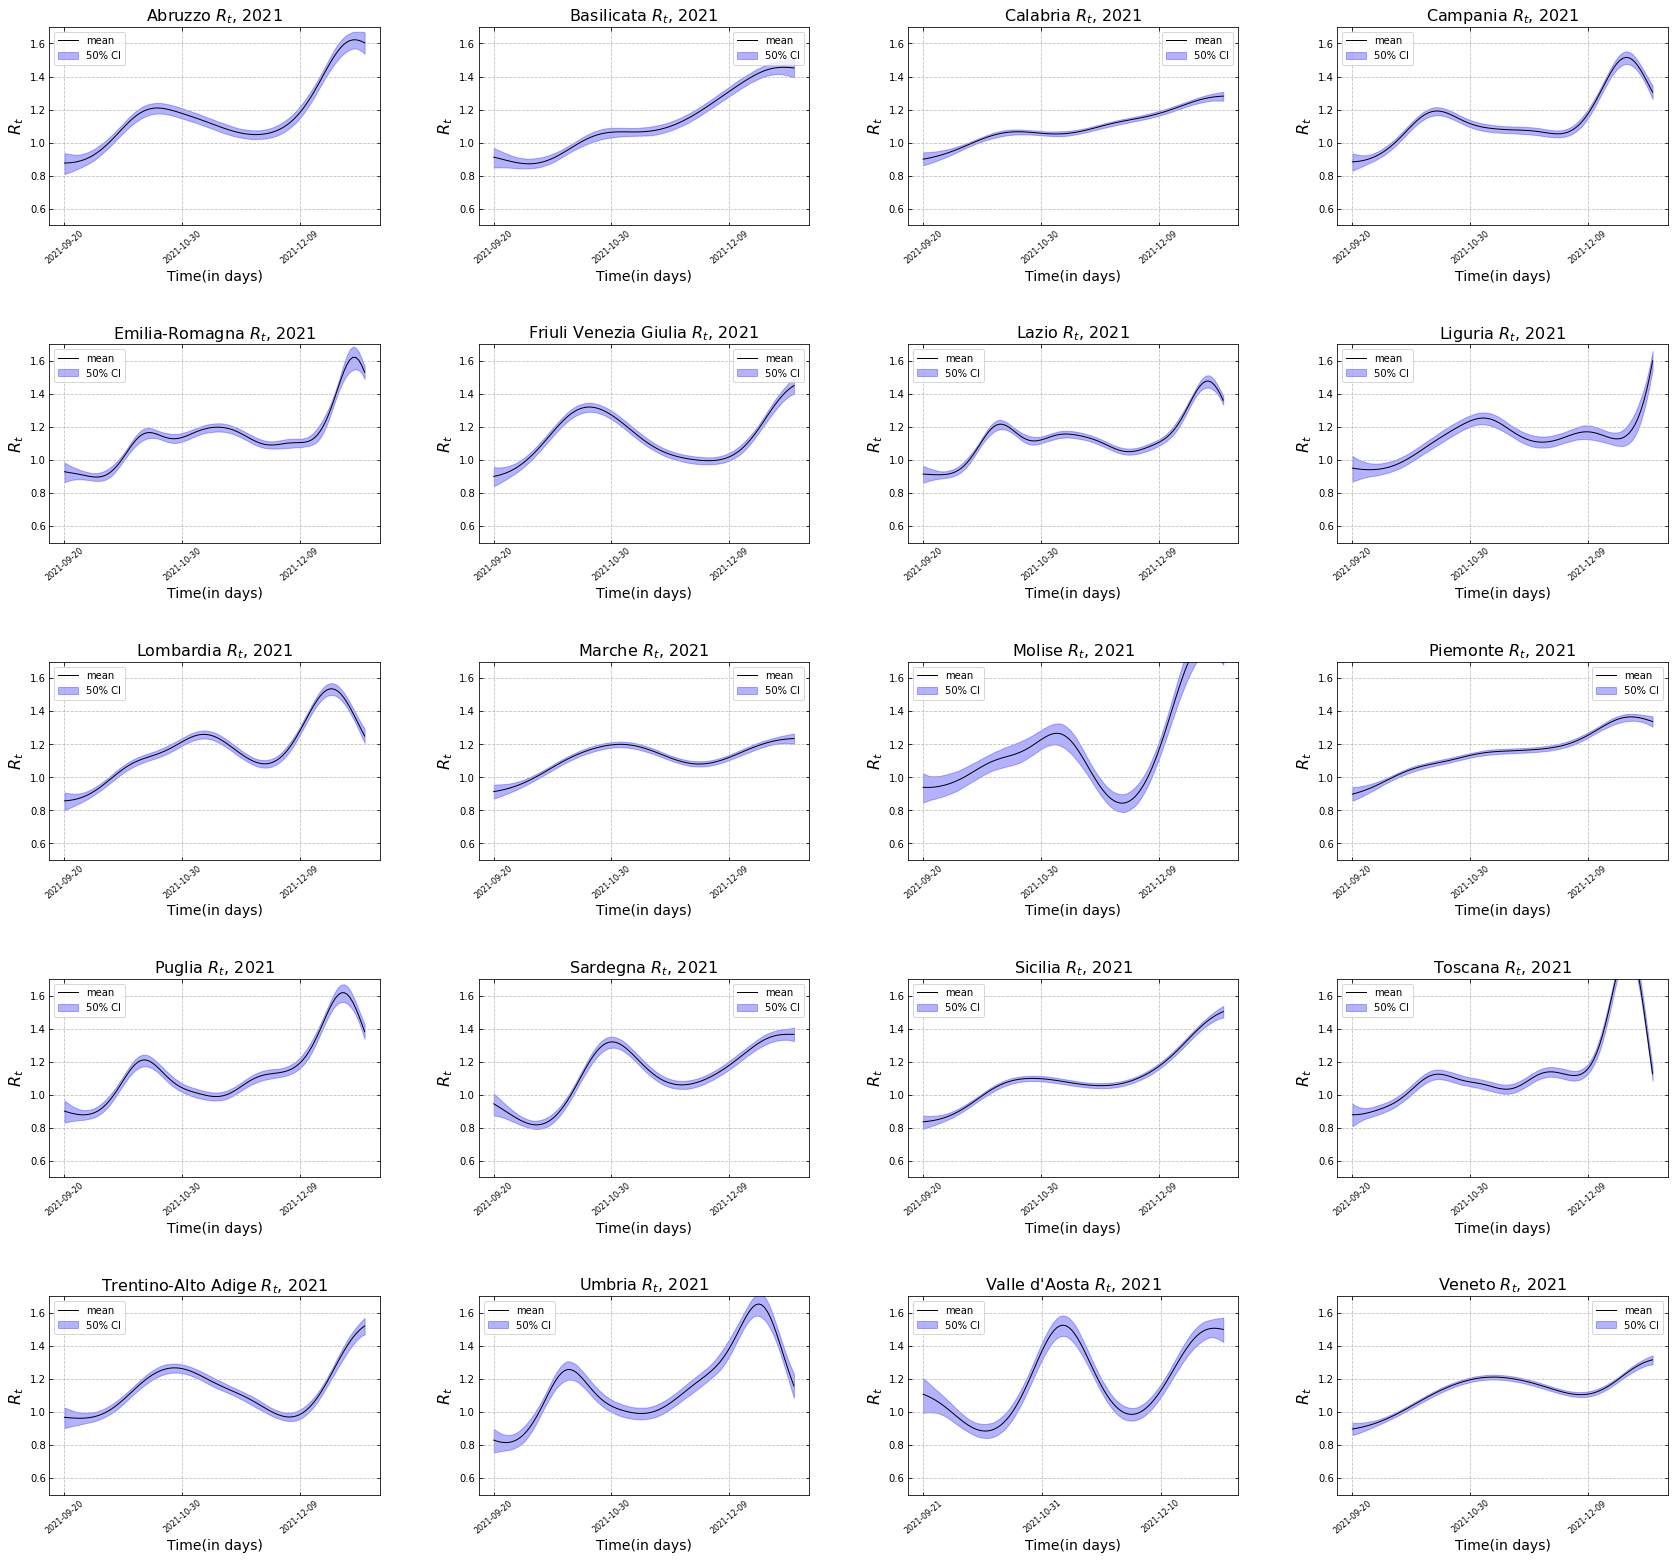

In [23]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
#new_regions = [regions_list[0],regions_list[2],regions_list[3],regions_list[4]]

for b,i in enumerate(regions):
    
    df_r=df[df['region'] == i]
    df_r=df_r[df_r['date'].between("2021-09-20","2021-12-31")]
    
    y=np.array(df_r['mean'])
    x=np.array(df_r['date'])
    #axs[b].figure(figsize=(10,6))
    axs[b].plot(x,y,linewidth=1,color='black',label='mean')
    #axs[b].fill_between(x, df_r['lower_90'], df_r['upper_90'], color='b', alpha=.6,label='10% CI')
    axs[b].fill_between(x, df_r['lower_50'], df_r['upper_50'], color='b', alpha=.3,label='50% CI') 
    
      # aesthetics and shit
    axs[b].set_ylabel('$R_{t}$',size=16)
    axs[b].set_xlabel("Time(in days)",size=14)
    axs[b].set_title('%s $R_{t}$, 2021'%i,size=16)
    axs[b].set_xticks(x[::40])
    axs[b].set_xticklabels(x[::40],fontsize=8,rotation=40)
    axs[b].legend(loc='best')
    axs[b].set_ylim([0.5,1.7])

    axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    axs[b].grid(linestyle='--',alpha=0.8,which='both')
    
    
plt.savefig('All_region_Rt')

In [24]:
mobility_list = ['retail_and_recreation_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline'] 


regions_list= ['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna']

In [25]:
sns.set()

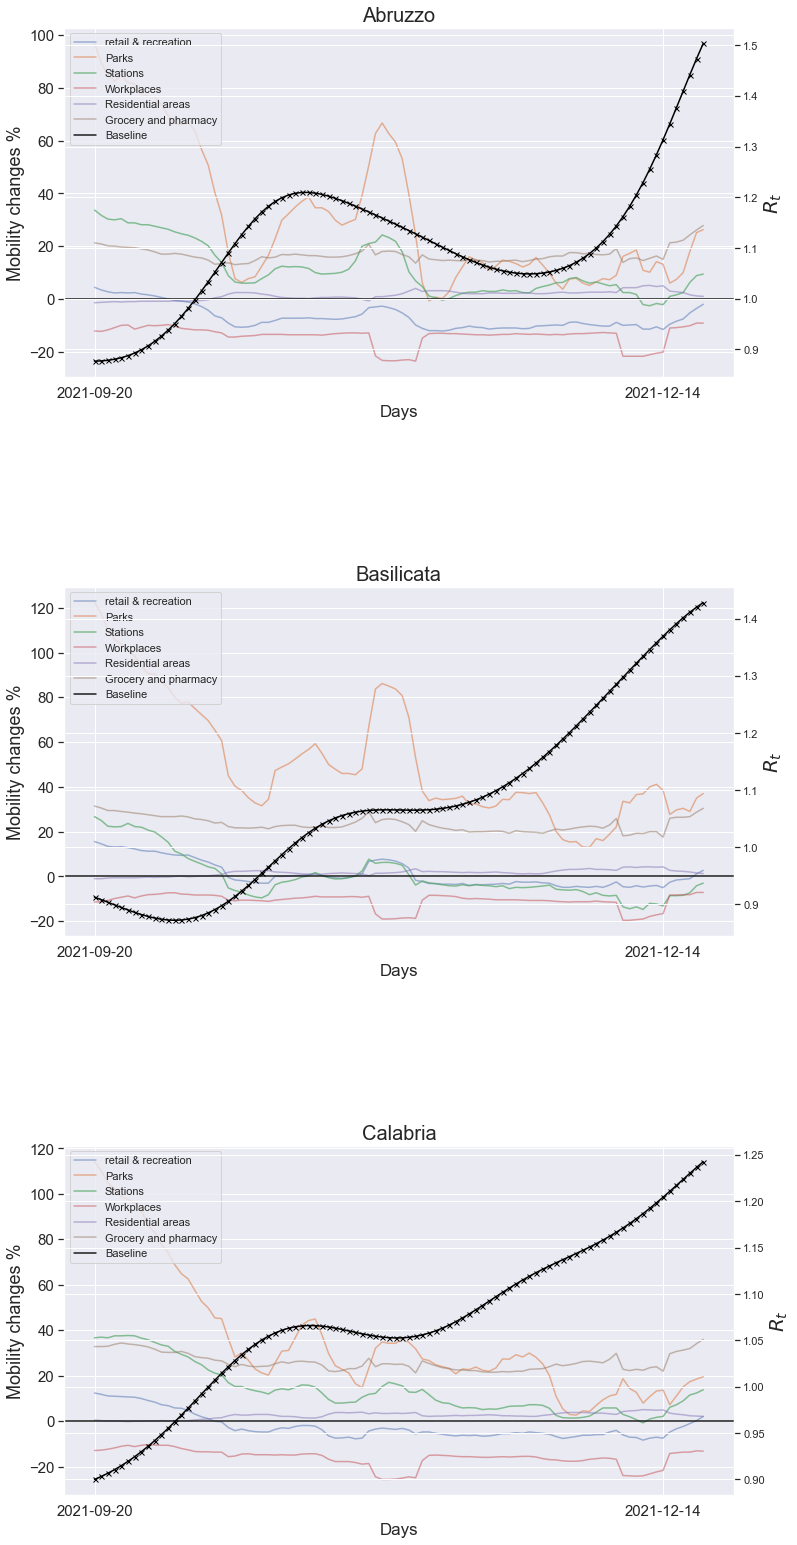

In [29]:
fig, axs = plt.subplots(3,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Abruzzo',
 'Basilicata',
 'Calabria']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-20')]
        
        reg_rt = df[df['region']==i] 
        reg_rt = reg_rt[reg_rt['date'].between('2021-01-01','2021-12-20')]
 

        idx1 = pd.Index(reg_rt['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_rt = reg_rt[reg_rt.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        rt=reg_rt['mean']
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,rt,label='$R_t$',color="black",linestyle="solid", marker="x",markersize=5)
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('$R_t$',size=20)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="upper left")

plt.savefig('real_Rt_1')

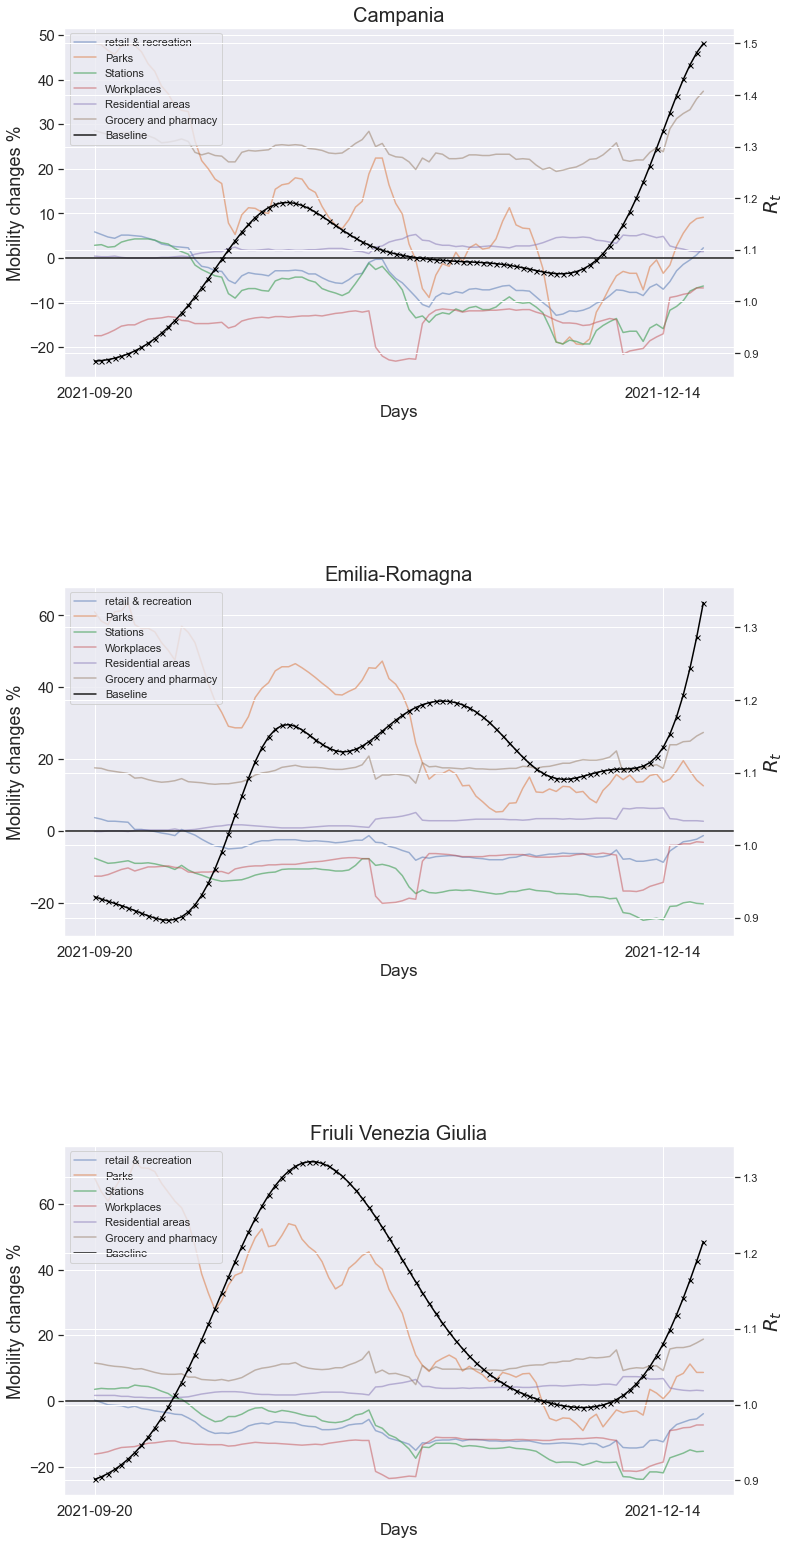

In [30]:
fig, axs = plt.subplots(3,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate([
 'Campania',
 'Emilia-Romagna',
 'Friuli Venezia Giulia']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-20')]
        
        reg_rt = df[df['region']==i] 
        reg_rt = reg_rt[reg_rt['date'].between('2021-01-01','2021-12-20')]
 

        idx1 = pd.Index(reg_rt['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_rt = reg_rt[reg_rt.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        rt=reg_rt['mean']
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,rt,label='$R_t$',color="black",linestyle="solid", marker="x",markersize=5)
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('$R_t$',size=20)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="upper left")
        
plt.savefig('real_Rt_2')

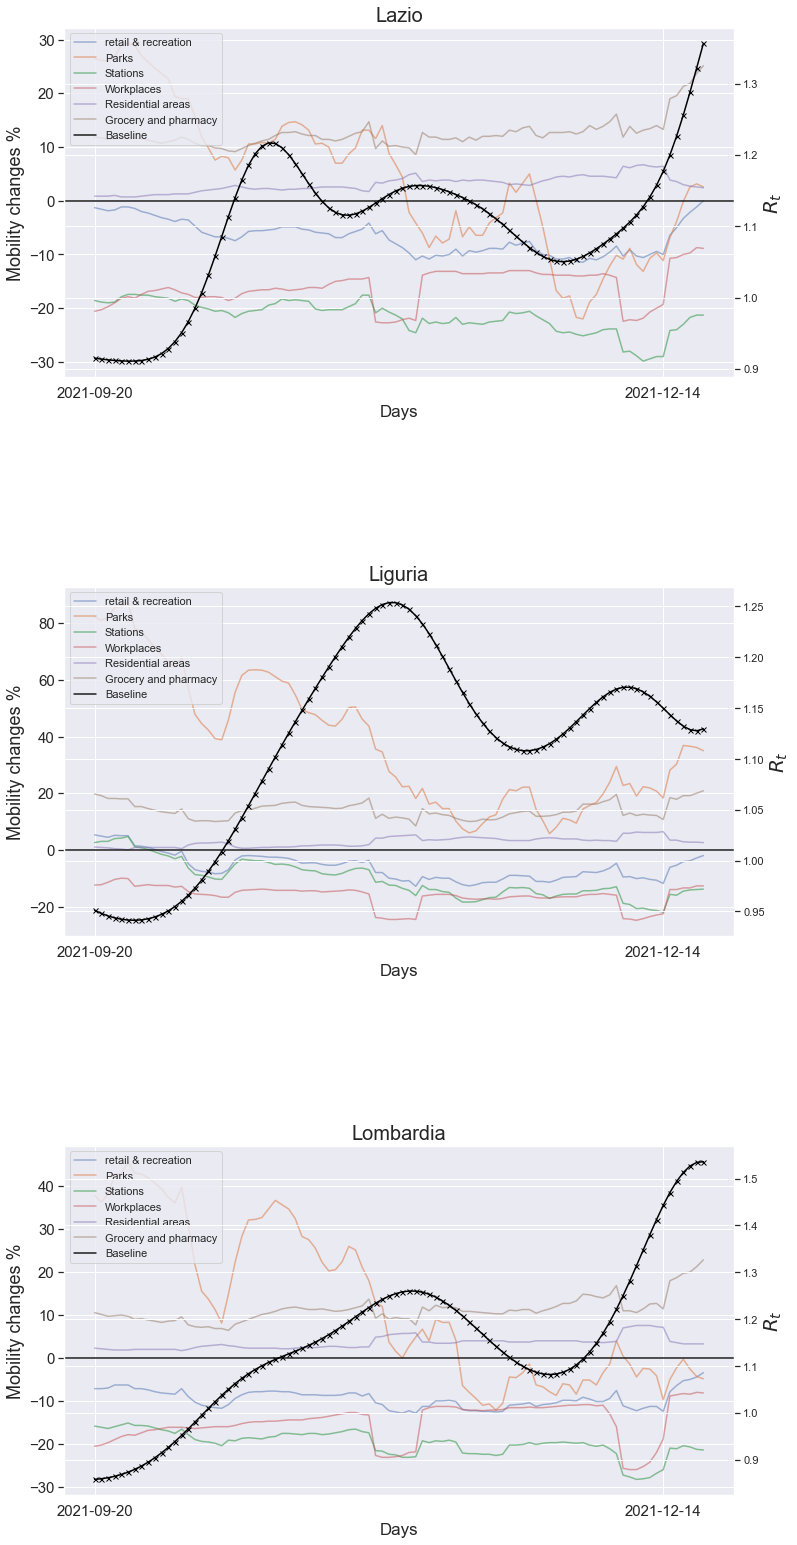

In [31]:
fig, axs = plt.subplots(3,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate([
 'Lazio',
 'Liguria',
 'Lombardia']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-20')]
        
        reg_rt = df[df['region']==i] 
        reg_rt = reg_rt[reg_rt['date'].between('2021-01-01','2021-12-20')]
 

        idx1 = pd.Index(reg_rt['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_rt = reg_rt[reg_rt.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        rt=reg_rt['mean']
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,rt,label='$R_t$',color="black",linestyle="solid", marker="x",markersize=5)
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('$R_t$',size=20)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="upper left")
        
plt.savefig('real_Rt_3')

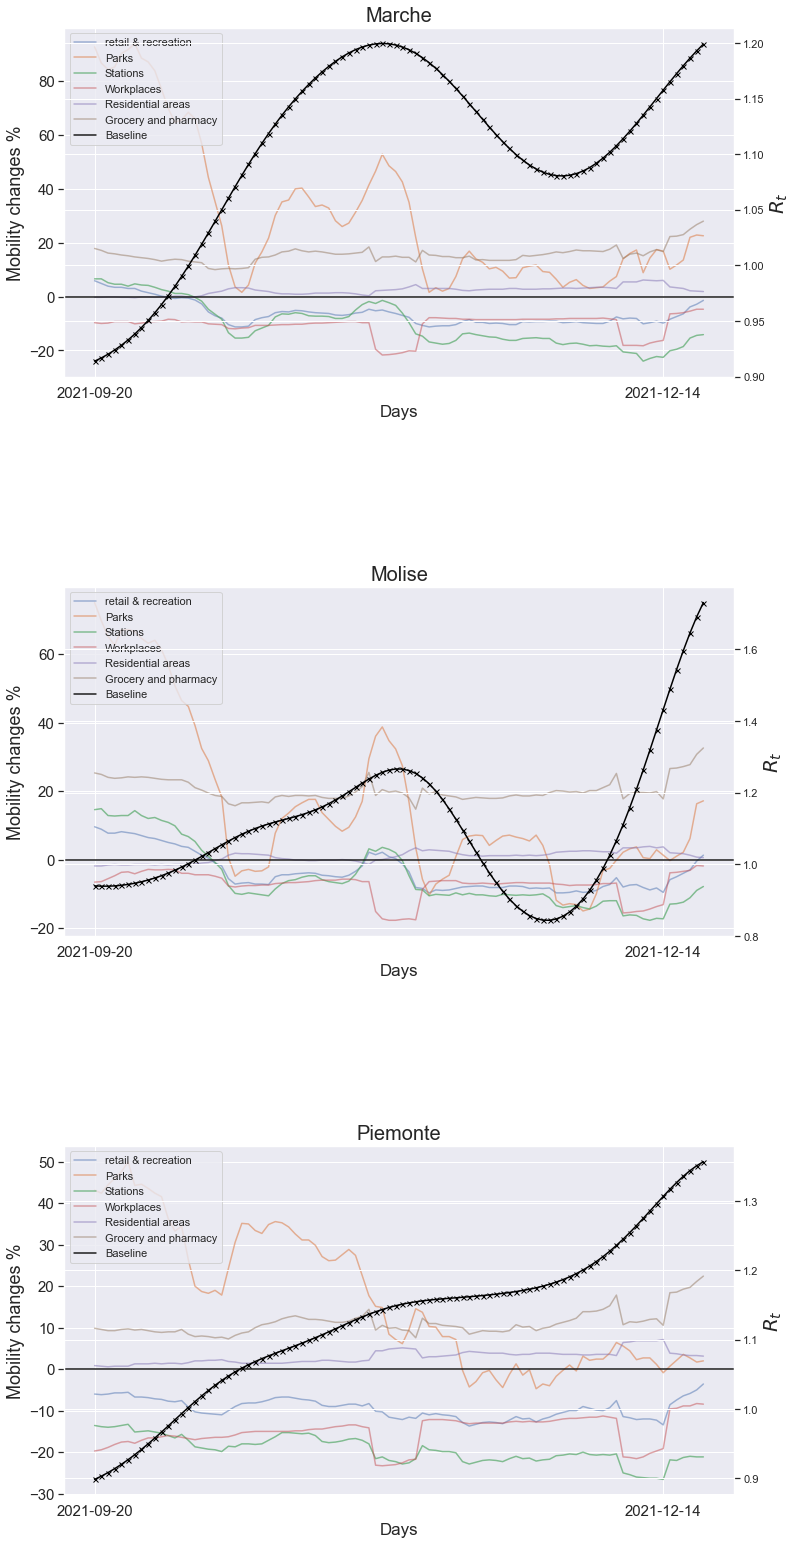

In [32]:
fig, axs = plt.subplots(3,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate([
 'Marche',
 'Molise',
 'Piemonte']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-20')]
        
        reg_rt = df[df['region']==i] 
        reg_rt = reg_rt[reg_rt['date'].between('2021-01-01','2021-12-20')]
 

        idx1 = pd.Index(reg_rt['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_rt = reg_rt[reg_rt.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        rt=reg_rt['mean']
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,rt,label='$R_t$',color="black",linestyle="solid", marker="x",markersize=5)
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('$R_t$',size=20)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="upper left")
        
plt.savefig('real_Rt_4')

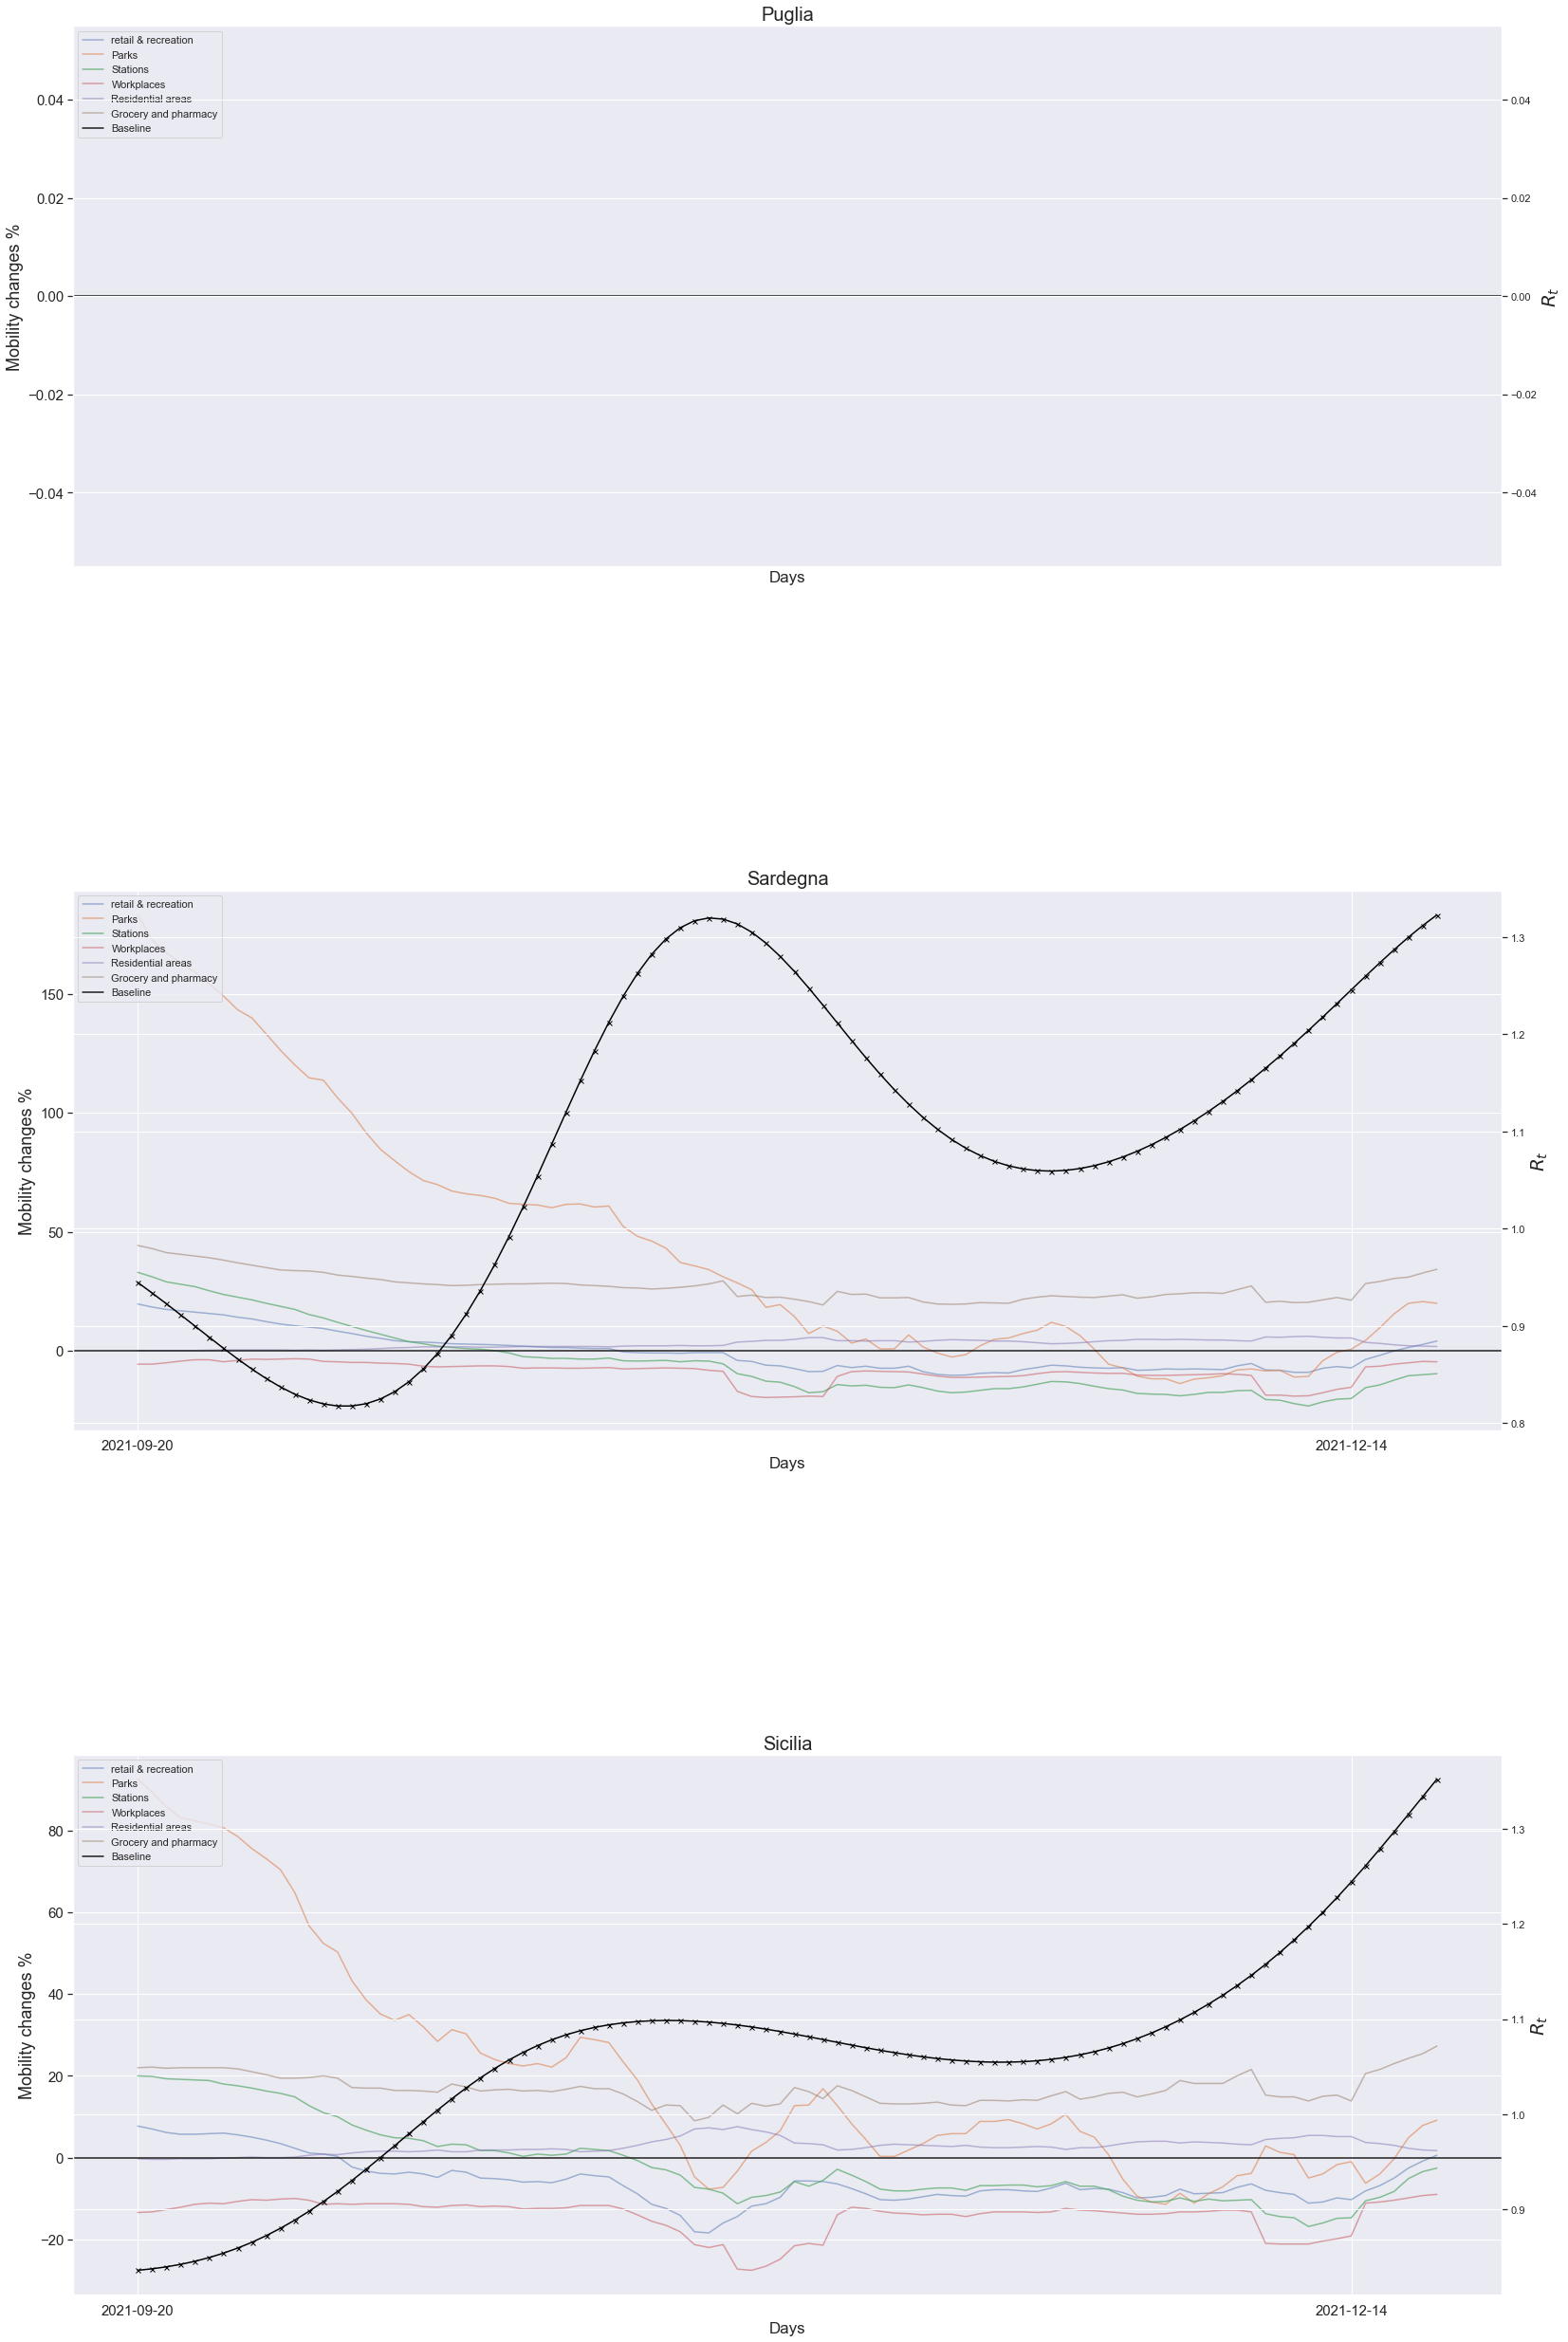

In [33]:
fig, axs = plt.subplots(3,1, figsize=(27, 44))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate([
 'Puglia',
 'Sardegna',
 'Sicilia']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-20')]
        
        reg_rt = df[df['region']==i] 
        reg_rt = reg_rt[reg_rt['date'].between('2021-01-01','2021-12-20')]
 

        idx1 = pd.Index(reg_rt['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_rt = reg_rt[reg_rt.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        rt=reg_rt['mean']
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,rt,label='$R_t$',color="black",linestyle="solid", marker="x",markersize=5)
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('$R_t$',size=20)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="upper left")

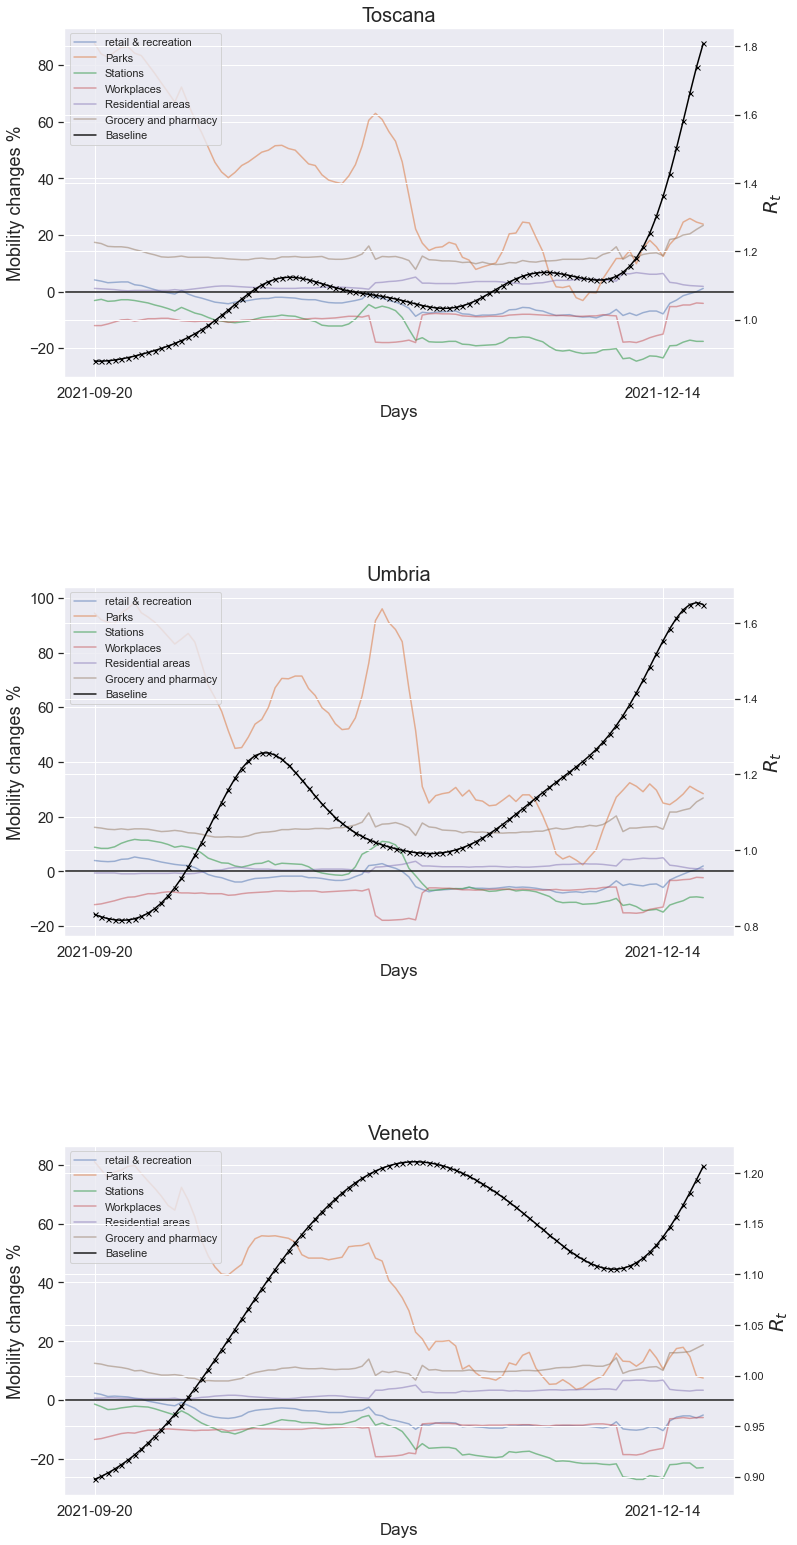

In [34]:
fig, axs = plt.subplots(3,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate([
 'Toscana',
 'Umbria',
 'Veneto']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-20')]
        
        reg_rt = df[df['region']==i] 
        reg_rt = reg_rt[reg_rt['date'].between('2021-01-01','2021-12-20')]
 

        idx1 = pd.Index(reg_rt['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_rt = reg_rt[reg_rt.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        rt=reg_rt['mean']
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,rt,label='$R_t$',color="black",linestyle="solid", marker="x",markersize=5)
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('$R_t$',size=20)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="upper left")
        
plt.savefig('real_Rt_5')